# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [127]:
import random
from pathlib import Path
import pandas as pd

In [128]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [129]:
DATA_PATH = Path("data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [130]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [131]:
df = pd.read_csv(dataframe_path, index_col=0)
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [133]:
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


In [134]:
df.describe()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,forest_mixed,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,max_max_temp,yearly_avg_temp,ignition
count,22030.000000,22030.000000,22030.000000,22030.000000,22030.000000,22030.000000,22030.0,22030.000000,22030.000000,22030.0,...,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,15204.000000,22035.000000
mean,23646.387792,5966.777537,5152.597702,30127.951951,0.006415,0.013557,0.0,0.326108,-4584.657286,0.0,...,158.859675,197.707583,76.109929,0.285717,1.662872,0.426235,2011.278784,59.230929,14.999755,0.150669
std,19248.657525,7515.660146,6924.754655,30099.446768,0.057848,0.088239,0.0,0.433120,20915.699938,0.0,...,135.801507,83.336828,8.027890,0.078390,3.230198,0.455856,5.693506,7.983432,0.100675,0.357734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-100000.000000,0.0,...,-4.109107,0.792745,40.705662,0.050758,-0.000007,0.000000,2001.000000,34.109174,14.597322,0.000000
25%,9568.829605,707.106781,250.000000,8265.137627,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,7.687609,133.581253,70.623573,0.233063,0.000000,0.000000,2006.000000,53.440945,14.931427,0.000000
50%,18494.931738,2610.076627,1581.138830,20846.161854,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,276.348625,203.072937,76.005028,0.287844,0.154361,0.166667,2012.000000,58.614709,14.999861,0.000000
75%,32310.988843,8384.323013,7941.190087,41340.053217,0.000000,0.000000,0.0,0.916667,0.000000,0.0,...,280.721741,257.033798,81.626057,0.346534,1.854040,1.000000,2016.000000,64.858667,15.068628,0.000000
max,110474.261708,43784.986011,40094.419811,159274.919557,1.000000,1.000000,0.0,1.000000,0.000000,0.0,...,292.551632,358.530182,98.558968,0.501387,40.440075,1.000000,2021.000000,90.376239,15.369208,1.000000


# Data cleaning

In [135]:
# I want to know how many NaN there are in the dataset
for column in df:
    print(df[column].isna().sum())

0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
32
0
0
6831
0


In [136]:
df.vegetation_class.unique()

array(['forest', 'wetland', 'herbaceous_vegetation', 'Forestt',
       'shrubland', 'water', 'urban', nan, '$herb$aceous_vegetation'],
      dtype=object)

With the following code I will change the 'vegetation_class' of two uncorrect rows: I will correct the rows with '$herb$aceous_vegetation' and 'Forestt'.

In [137]:
df[df.vegetation_class == '$herb$aceous_vegetation']= df[df.vegetation_class == '$herb$aceous_vegetation'].replace(['$herb$aceous_vegetation'],'herbaceous_vegetation')
#df[df.vegetation_class == '$herb$aceous_vegetation']
df[df.vegetation_class == 'Forestt']= df[df.vegetation_class == 'Forestt'].replace(['Forestt'],'forest')
#df[df.vegetation_class=='Forestt']
df.vegetation_class.unique()


array(['forest', 'wetland', 'herbaceous_vegetation', 'shrubland', 'water',
       'urban', nan], dtype=object)

In [138]:
#for i in range(2,35):
 #   plt.figure()
  #  plt.plot(df.iloc[:,i])
df.forest_deciduous_needle.unique()
df.forest_mixed.unique()
df.moss_lichen.unique()

array([ 0., nan])

I noticed that 3 columns are all set to 0, so I can delete them as they are not significant.
The identified columns are: 'forest_deciduous_needle', 'forest_mixed', 'moss_lichen'

In [139]:
df = df.drop('forest_deciduous_needle', axis = 1)
df = df.drop('forest_mixed', axis = 1)
df = df.drop('moss_lichen', axis = 1)

In [140]:
indici_na = df[df.distance_fire_stations.isna()].index
df[df.distance_fire_stations.isna()]
#indici_na
#

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
8031,2002-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.641388,71.991280,0.115327,0.0,0.0,NaN,2002,61.709884,14.995481,0
10398,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157.834579,71.008575,0.251052,0.0,0.0,NaN,2017,62.269799,15.037558,0
14704,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.659943,78.968040,0.307418,0.0,0.0,NaN,2016,61.817973,15.052976,0
17444,2003-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205.237061,80.847252,0.280676,0.0,0.0,NaN,2003,59.260843,15.037933,0
20679,2005-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.377090,78.182716,0.236421,0.0,0.0,NaN,2005,60.725573,14.815469,0


In 5 rows, 19 over 42 columns are NaN; since this happens only in 5 rows over 22035, we can drop them without loss of strong information. Trying to estimate the missing values would be too much demanding in comparison to the number of rows.

In [141]:
df = df.drop(indici_na)
for column in df:
    print(df[column].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27
0
0
6831
0


Now the missing values are present only in 'vegetation_class' and in 'yearly_avg_temp'.

In [142]:
df = df.drop('Date', axis = 1) #Tolgo date perchè non ha rilevanza
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


Now I have to take into account the presence of the Nan, in particularly I consider now the column 'yearly_avg_temp'.
There are basically two possibilities: drop the column or use a technique to estimate the nan values.
I decided to drop the column for many reasons: first of all, the variance is very small across all the data in the column, so I can suppose that the dependence is not so high, and this fact is enforced by the correlation matrix, indeed correlation between ignition and yearly_avg_temp is ~0.01.

In [143]:
df = df.drop('yearly_avg_temp', axis = 1)
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,1


In [144]:
df[df.vegetation_class.isna()]
#new_df[new_df.vegetation_class.isna()].iloc[:, 5:15].max(axis=1)

df[df.sprarse_vegetation > 0.5] #classified as herbaceous_vegetation, which seems to be coherent
test = df['forest'] + df['water'] + df['herbaceous_vegetation'] + df['wetland'] + df['urban'] + df['shrubland'] + df['sprarse_vegetation']
#plt.plot(test)
#plt.plot(test)

# The analysis shows that 'cropland' has not been included in 'vegetation_class'. In 27 missing values, I noticed that the cropland values is always the highest, so all the points belonging to cropland have not been classified and the test above confirms this fact.
# I assign the remaining nan values to cropland

df.loc[df['vegetation_class'].isna(), 'vegetation_class']='cropland'
test = test + df['cropland']
df.corr() #max_temp and max_max_temp have correlation of 1


C:\Users\David\AppData\Local\Temp\ipykernel_12312\3391732585.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #max_temp and max_max_temp have correlation of 1


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,max_max_temp,ignition
distance_fire_stations,1.000000,0.380998,0.597202,0.361672,-4.109216e-02,-0.089753,-0.157933,-0.002915,-0.182219,-0.078787,...,0.177206,-0.004632,-0.004945,0.114476,-0.141412,0.024765,-0.243551,-0.008939,-0.104301,-0.228656
distance_rivers,0.380998,1.000000,0.810262,0.511959,-5.275080e-02,-0.072211,-0.393945,-0.002696,-0.246586,-0.300005,...,0.405720,-0.001486,-0.065588,-0.101395,-0.293590,-0.285531,-0.491284,-0.007203,0.044370,-0.218113
distance_roads,0.597202,0.810262,1.000000,0.501996,-7.504581e-02,-0.077587,-0.360746,-0.006670,-0.247274,-0.249587,...,0.346209,-0.005622,-0.042441,-0.018912,-0.255832,-0.185321,-0.461069,-0.010728,-0.024913,-0.268259
distance_powerlines,0.361672,0.511959,0.501996,1.000000,-2.527940e-02,-0.070206,-0.338461,-0.001519,-0.216921,-0.154048,...,0.532158,-0.001569,-0.070887,-0.107333,-0.318020,-0.204134,-0.425787,-0.004821,0.014641,-0.205647
cropland,-0.041092,-0.052751,-0.075046,-0.025279,1.000000e+00,-0.015496,-0.079617,0.006489,-0.016849,0.070603,...,-0.014332,-0.011687,-0.029765,-0.004638,0.016609,-0.002574,-0.085684,-0.012438,0.015766,-0.022591
forest_deciduous_broad,-0.089753,-0.072211,-0.077587,-0.070206,-1.549613e-02,1.000000,-0.076020,0.005804,0.078933,-0.030414,...,-0.072732,-0.006669,0.050575,-0.021822,0.010408,0.009997,0.154313,-0.004491,-0.006093,0.097047
forest_evergreen_broad,-0.157933,-0.393945,-0.360746,-0.338461,-7.961733e-02,-0.076020,1.000000,-0.006621,-0.125350,-0.340918,...,-0.326574,0.009935,0.037423,0.132318,0.300918,0.241640,0.883029,0.014015,-0.037653,0.091934
forest_evergreen_needle,-0.002915,-0.002696,-0.006670,-0.001519,6.489341e-03,0.005804,-0.006621,1.000000,-0.005376,0.007485,...,0.002094,-0.196420,0.001164,-0.017213,-0.007299,-0.003778,-0.007414,-0.335774,0.005497,0.012867
forest_unknown,-0.182219,-0.246586,-0.247274,-0.216921,-1.684900e-02,0.078933,-0.125350,-0.005376,1.000000,0.036437,...,-0.169904,-0.001067,0.052317,-0.024074,0.086875,0.053755,0.313945,0.005237,0.012283,0.214991
herbaceous_vegetation,-0.078787,-0.300005,-0.249587,-0.154048,7.060314e-02,-0.030414,-0.340918,0.007485,0.036437,1.000000,...,-0.183795,-0.003971,0.036581,0.021387,0.063392,0.109559,-0.314575,0.001175,-0.012504,0.061074


In [317]:
#df[df.cropland!=0] #except for 467 rows over the 22035, the value of cropland is always 0, so we can set the nan values to 0 for cropland

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,ignition
13,29319.362203,6373.774392,1250.000000,500.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.500000,...,21.204294,4.232878,8.682389,105.670219,61.700409,0.136492,0.516819,0.000000,herbaceous_vegetation,1
315,14859.761102,5153.882032,1903.943276,101243.826972,0.083333,0.000000,0.000000,0.0,0.000000,0.833333,...,26.760233,7.261349,286.783918,199.987717,63.178692,0.123781,0.435935,0.000000,herbaceous_vegetation,1
335,10982.941318,250.000000,2000.000000,19661.192741,0.166667,0.000000,0.000000,0.0,0.500000,0.333333,...,17.639212,4.346106,7.492670,218.287949,76.266182,0.336704,2.074971,0.500000,forest,1
336,5700.877125,250.000000,1030.776406,1457.737974,0.083333,0.000000,0.000000,0.0,0.583333,0.333333,...,12.623840,5.580996,278.556628,325.792389,72.696785,0.381458,1.189257,0.583333,forest,1
356,4031.128874,750.000000,0.000000,250.000000,0.166667,0.000000,0.000000,0.0,0.666667,0.166667,...,18.282858,4.234584,278.952361,127.387062,64.356285,0.334482,0.031093,0.666667,forest,1
358,4031.128874,750.000000,0.000000,250.000000,0.166667,0.000000,0.000000,0.0,0.666667,0.166667,...,19.187418,3.913877,7.643896,236.811768,64.670982,0.270664,0.078736,0.666667,forest,1
359,3807.886553,901.387819,0.000000,250.000000,0.166667,0.000000,0.000000,0.0,0.666667,0.166667,...,20.888123,3.670198,281.859280,301.330658,68.593178,0.258419,0.003909,0.666667,forest,1
360,3807.886553,901.387819,0.000000,250.000000,0.166667,0.000000,0.000000,0.0,0.666667,0.166667,...,18.409597,3.385270,7.949847,191.001694,75.061760,0.327319,0.001085,0.666667,forest,1
361,4031.128874,750.000000,0.000000,250.000000,0.166667,0.000000,0.000000,0.0,0.666667,0.166667,...,20.780649,5.408966,283.230706,310.035309,71.502708,0.277974,4.914705,0.666667,forest,1
526,30538.909607,559.016994,250.000000,24667.792767,0.083333,0.000000,0.000000,0.0,0.166667,0.750000,...,13.220825,11.626315,279.351739,321.243683,72.463326,0.217499,1.374956,0.166667,herbaceous_vegetation,1


In [145]:
df = df.drop('max_max_temp', axis = 1)
#df = df.drop('Year', axis = 1)
df.head()


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,5.772759,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,5.706931,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,5.213350,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,6.412321,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,4.307997,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,1


# Data Visualization

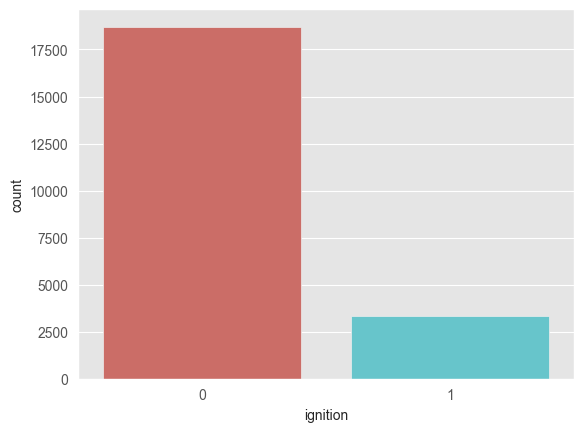

In [146]:
sns.countplot(x='ignition', data = df, palette='hls')
plt.show()
# Of course, we have unbalanced data

In [147]:
df.groupby('vegetation_class').mean()
#cropland has no positive ignition points

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,ignition
vegetation_class,,,,,,,,,,,,,,,,,,,,,
cropland,23753.146083,2514.879082,374.055696,24893.709601,0.969136,0.000000,0.003086,-11111.111111,0.003086,0.021605,...,15.326242,6.070765,149.453192,143.755948,75.727395,0.286754,0.882222,0.006173,2010.777778,0.000000
forest,18526.525974,2014.097489,1721.532322,16327.600872,0.001473,0.028895,0.729806,-4765.843068,0.163246,0.057006,...,14.979962,4.680700,159.594150,203.725892,77.035779,0.312894,2.522361,0.921948,2011.360385,0.230228
herbaceous_vegetation,21057.168141,1758.095610,1958.933085,21929.846634,0.025664,0.004912,0.022700,-4154.764996,0.073704,0.833853,...,15.050199,4.892576,158.354867,203.028113,76.437424,0.293744,2.331548,0.101316,2011.279927,0.180473
shrubland,34622.095988,1443.546176,3138.985833,24940.014676,0.000000,0.002525,0.031566,-3030.303030,0.131313,0.213384,...,14.329267,5.194056,131.263297,199.190990,78.844508,0.302875,3.591368,0.165404,2010.015152,0.212121
urban,3577.235167,916.970504,9.259259,4580.158951,0.009259,0.000000,0.029835,-1234.567901,0.118313,0.089506,...,17.796062,4.389587,152.781642,218.993088,72.095301,0.264092,1.282881,0.148148,2010.864198,0.493827
water,31168.006119,12857.755095,10949.901507,50434.428010,0.000082,0.000000,0.002559,-4575.727676,0.001809,0.007195,...,15.297856,7.347565,158.707778,188.595232,74.922307,0.250976,0.324542,0.004368,2011.208683,0.034287
wetland,21005.981497,3157.094735,1409.240733,43386.395271,0.002976,0.000372,0.053571,-5357.142857,0.059524,0.079241,...,15.961747,7.335864,153.664521,174.899189,74.176411,0.235276,1.194865,0.113467,2010.915179,0.294643


C:\Users\David\AppData\Local\Temp\ipykernel_12312\2252110568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

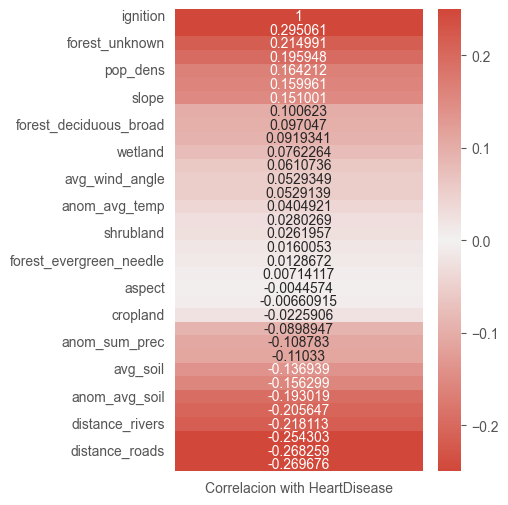

In [148]:
plt.figure(figsize=(4, 6))
correlation = df.corr()
a = correlation['ignition']
cmap = sns.diverging_palette(15, 15, as_cmap=True)
one_column = pd.DataFrame({"Correlacion with HeartDisease": a[1:]},
                  index=a.index[1:])
corrHD=one_column.sort_values(by='Correlacion with HeartDisease', ascending = False)
sns.heatmap(corrHD,vmin=-0.25, vmax=0.25, annot=True, fmt="g", cmap=cmap, center=0)

<Axes: xlabel='vegetation_class'>

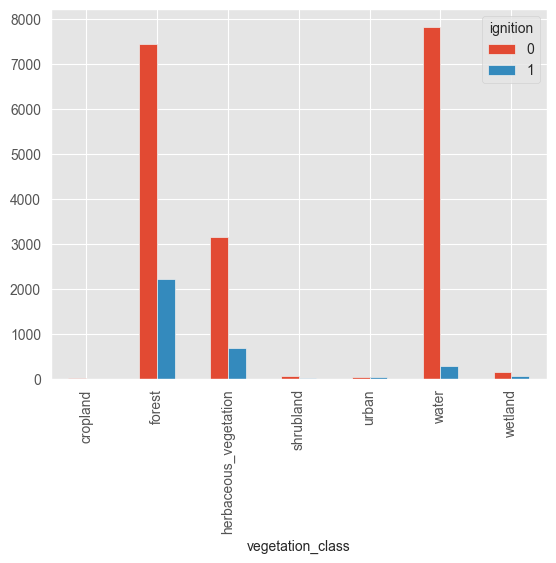

In [149]:
pd.crosstab(df.vegetation_class, df.ignition).plot(kind='bar')
#Most common classes: forest, herbaceous_vegetation and water
#High dependence on the vegetation_class, so it can have an high relevance on the prediction of ignition points

C:\Users\David\AppData\Local\Temp\ipykernel_12312\47062547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,ignition
distance_fire_stations,1.000000,0.380998,0.597202,0.361672,-4.109216e-02,-0.089753,-0.157933,-0.002915,-0.182219,-0.078787,...,-0.104301,0.177206,-0.004632,-0.004945,0.114476,-0.141412,0.024765,-0.243551,-0.008939,-0.228656
distance_rivers,0.380998,1.000000,0.810262,0.511959,-5.275080e-02,-0.072211,-0.393945,-0.002696,-0.246586,-0.300005,...,0.044370,0.405720,-0.001486,-0.065588,-0.101395,-0.293590,-0.285531,-0.491284,-0.007203,-0.218113
distance_roads,0.597202,0.810262,1.000000,0.501996,-7.504581e-02,-0.077587,-0.360746,-0.006670,-0.247274,-0.249587,...,-0.024913,0.346209,-0.005622,-0.042441,-0.018912,-0.255832,-0.185321,-0.461069,-0.010728,-0.268259
distance_powerlines,0.361672,0.511959,0.501996,1.000000,-2.527940e-02,-0.070206,-0.338461,-0.001519,-0.216921,-0.154048,...,0.014641,0.532158,-0.001569,-0.070887,-0.107333,-0.318020,-0.204134,-0.425787,-0.004821,-0.205647
cropland,-0.041092,-0.052751,-0.075046,-0.025279,1.000000e+00,-0.015496,-0.079617,0.006489,-0.016849,0.070603,...,0.015766,-0.014332,-0.011687,-0.029765,-0.004638,0.016609,-0.002574,-0.085684,-0.012438,-0.022591
forest_deciduous_broad,-0.089753,-0.072211,-0.077587,-0.070206,-1.549613e-02,1.000000,-0.076020,0.005804,0.078933,-0.030414,...,-0.006093,-0.072732,-0.006669,0.050575,-0.021822,0.010408,0.009997,0.154313,-0.004491,0.097047
forest_evergreen_broad,-0.157933,-0.393945,-0.360746,-0.338461,-7.961733e-02,-0.076020,1.000000,-0.006621,-0.125350,-0.340918,...,-0.037653,-0.326574,0.009935,0.037423,0.132318,0.300918,0.241640,0.883029,0.014015,0.091934
forest_evergreen_needle,-0.002915,-0.002696,-0.006670,-0.001519,6.489341e-03,0.005804,-0.006621,1.000000,-0.005376,0.007485,...,0.005497,0.002094,-0.196420,0.001164,-0.017213,-0.007299,-0.003778,-0.007414,-0.335774,0.012867
forest_unknown,-0.182219,-0.246586,-0.247274,-0.216921,-1.684900e-02,0.078933,-0.125350,-0.005376,1.000000,0.036437,...,0.012283,-0.169904,-0.001067,0.052317,-0.024074,0.086875,0.053755,0.313945,0.005237,0.214991
herbaceous_vegetation,-0.078787,-0.300005,-0.249587,-0.154048,7.060314e-02,-0.030414,-0.340918,0.007485,0.036437,1.000000,...,-0.012504,-0.183795,-0.003971,0.036581,0.021387,0.063392,0.109559,-0.314575,0.001175,0.061074


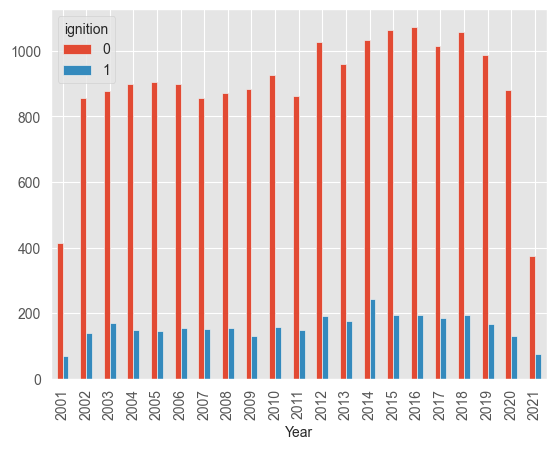

In [150]:
pd.crosstab(df.Year, df.ignition).plot(kind='bar')
df.corr()

We can suppose that the Year has not great relevance in our analysis; it seems to be difficult find a relation between ignition points and Year; moreover, looking at the correlation matrix we can see that it has a very weak correlation with other variables and also the plot above doesn't show any particular pattern, so, for sake of simplicity, I decide to drop also this column

In [151]:
df = df.drop('Year', axis = 1)

Now I want to have a look to the two classes: ignition = 0 vs ignition = 1

In [152]:
data_1=df.loc[df["ignition"] == 1] # I take data where an ignition occurred
data_0=df.loc[df["ignition"] == 0] # I take data where an ignition didn't occurr
data_1.shape # (nrow=3320, ncol=35)
data_0.shape # (nrow=18710, ncol=35)

(18710, 35)

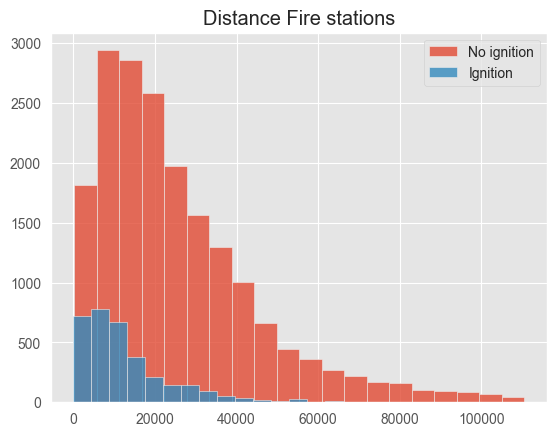

In [153]:
plt.style.use("ggplot")
plt.title("Distance Fire stations")
plt.hist(data_0["distance_fire_stations"],bins=20,  alpha=0.8, label='No ignition')
plt.hist(data_1["distance_fire_stations"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

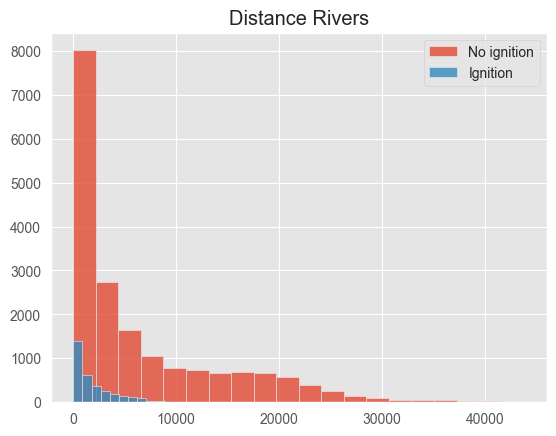

In [154]:
plt.style.use("ggplot")
plt.title("Distance Rivers")
plt.hist(data_0["distance_rivers"],bins=20,  alpha=0.8, label='No ignition')
plt.hist(data_1["distance_rivers"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

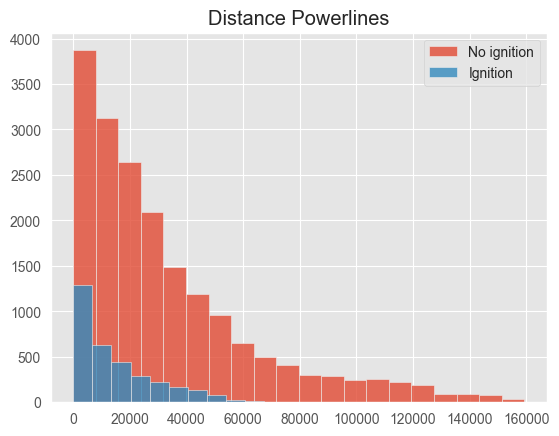

In [155]:
plt.style.use("ggplot")
plt.title("Distance Powerlines")
plt.hist(data_0["distance_powerlines"],bins=20,  alpha=0.8, label='No ignition')
plt.hist(data_1["distance_powerlines"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


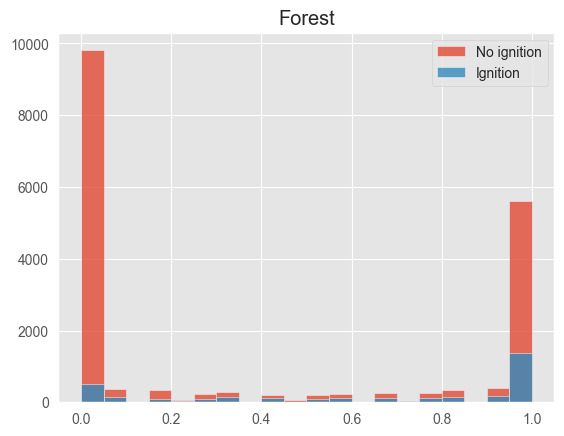

In [156]:
plt.legend()
plt.style.use("ggplot")
plt.title("Forest")
plt.hist(data_0["forest"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["forest"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


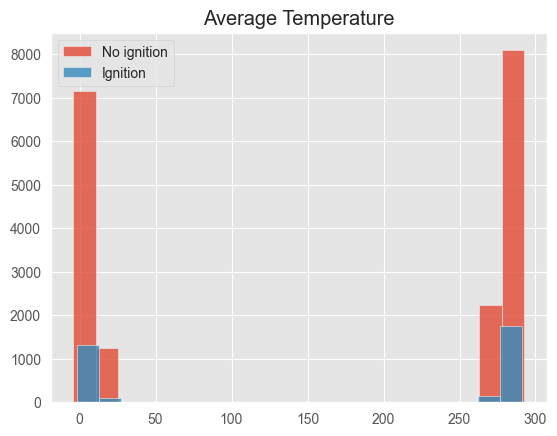

In [157]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average Temperature")
plt.hist(data_0["avg_temp"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["avg_temp"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


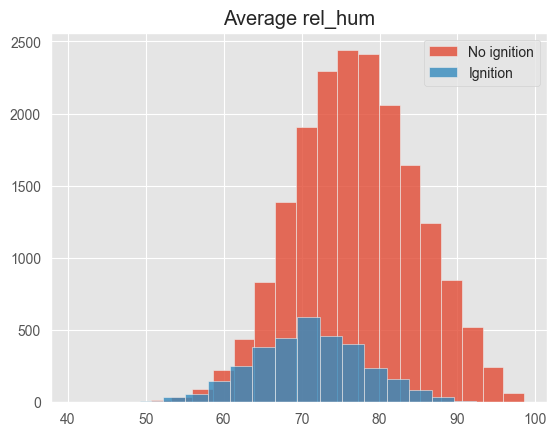

In [158]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average rel_hum")
plt.hist(data_0["avg_rel_hum"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["avg_rel_hum"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


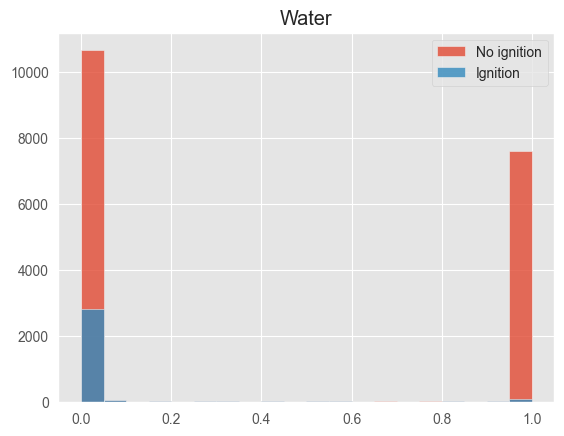

In [159]:
plt.legend()
plt.style.use("ggplot")
plt.title("Water")
plt.hist(data_0["water"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["water"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

In [160]:
data_0 = data_0[['vegetation_class', 'ignition']]
data_1 = data_1[['vegetation_class', 'ignition']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


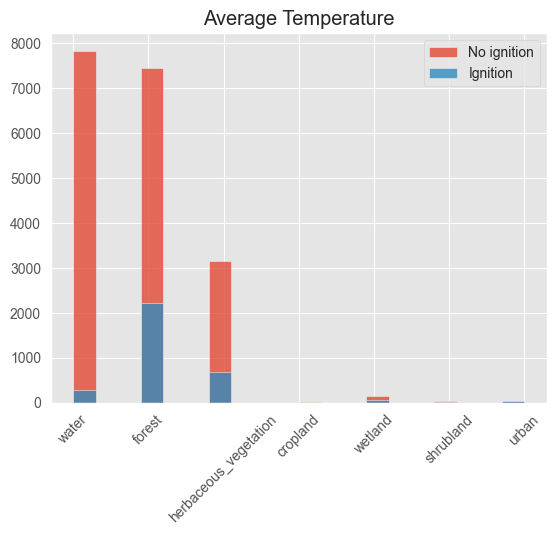

In [161]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average Temperature")
plt.xticks(rotation = 45)
plt.hist(data_0["vegetation_class"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["vegetation_class"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

In [162]:
data_0.loc[data_0.vegetation_class == 'urban'] #41
data_1.loc[data_1.vegetation_class == 'urban'] #40
data_0.loc[data_0.vegetation_class == 'shrubland'] #52
data_1.loc[data_1.vegetation_class == 'shrubland'] #14
data_0.loc[data_0.vegetation_class == 'wetland'] #158
data_1.loc[data_1.vegetation_class == 'wetland'] #66
data_0.loc[data_0.vegetation_class == 'cropland'] #27
data_1.loc[data_1.vegetation_class == 'cropland'] #0: No ignition points in cropland areas
data_0.loc[data_0.vegetation_class == 'forest'] #7446
data_1.loc[data_1.vegetation_class == 'forest'] #2227
data_0.loc[data_0.vegetation_class == 'herbaceous_vegetation'] #3156
data_1.loc[data_1.vegetation_class == 'herbaceous_vegetation'] #695
data_0.loc[data_0.vegetation_class == 'water'] #7830
data_1.loc[data_1.vegetation_class == 'water'] #278

,vegetation_class,ignition
145,water,1
188,water,1
199,water,1
200,water,1
282,water,1
328,water,1
329,water,1
382,water,1
389,water,1
391,water,1


C:\Users\David\AppData\Local\Temp\ipykernel_12312\3873832991.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1=df.drop('vegetation_class', 1)
C:\Users\David\AppData\Local\Temp\ipykernel_12312\3873832991.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ignition', 1)


<Axes: >

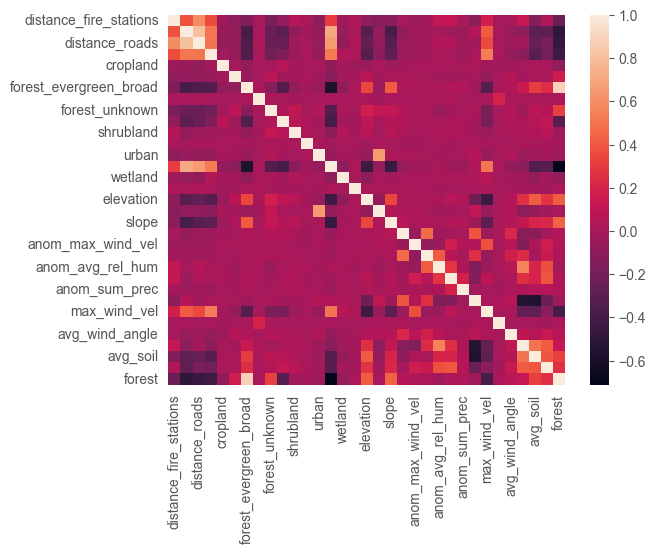

In [163]:
df1=df.drop('vegetation_class', 1)
df1 = df1.drop('ignition', 1)
df1=abs(df1)
corr1=df1.corr()
sns.heatmap(corr1)

C:\Users\David\AppData\Local\Temp\ipykernel_12312\74369420.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop('vegetation_class', 1)


<Axes: >

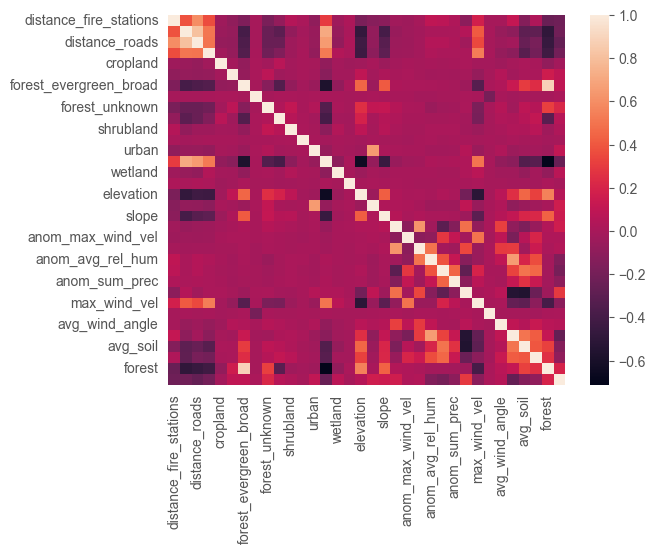

In [164]:
df1 = df.drop('vegetation_class', 1)
corr2 = df1.corr()
sns.heatmap(corr2)

In [165]:
corr2["ignition"].sort_values()

avg_rel_hum               -0.269676
distance_roads            -0.268259
water                     -0.254303
distance_fire_stations    -0.228656
distance_rivers           -0.218113
distance_powerlines       -0.205647
anom_avg_soil             -0.193019
anom_avg_rel_hum          -0.156299
avg_soil                  -0.136939
max_wind_vel              -0.110330
anom_sum_prec             -0.108783
sum_prec                  -0.089895
cropland                  -0.022591
sprarse_vegetation        -0.006609
aspect                    -0.004457
forest_evergreen_needle    0.012867
avg_temp                   0.016005
shrubland                  0.026196
anom_max_wind_vel          0.028027
anom_avg_temp              0.040492
elevation                  0.052914
avg_wind_angle             0.052935
herbaceous_vegetation      0.061074
wetland                    0.076226
forest_evergreen_broad     0.091934
forest_deciduous_broad     0.097047
urban                      0.100623
slope                      0

In [166]:
arr=abs(corr1.unstack()).sort_values(ascending=False) #tomo los valores absolutos de la matrix en una sola columna, ordino decrescente
pd.set_option('display.max_rows', 1000)
arr= arr[arr!=1]
#Claramente tendrè valores doble, porque la matriz es simmetrica
#Tomar las 5 mas relaccionadas significa elegir las filas: 0,2,4,6,8
top5=arr[0:9:2]
top5


forest           forest_evergreen_broad    0.883029
distance_roads   distance_rivers           0.810262
water            forest                    0.711197
distance_rivers  water                     0.711018
distance_roads   water                     0.650302
dtype: float64

<Axes: xlabel='forest', ylabel='forest_evergreen_broad'>

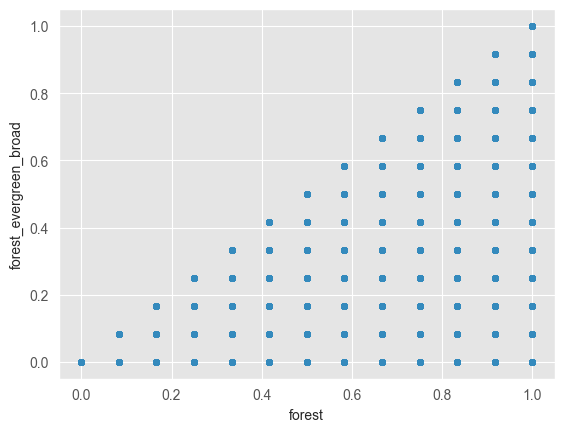

In [167]:
top2corr = df[["forest_evergreen_broad", "forest"]] #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="forest", y="forest_evergreen_broad") #hago el scatterplot con el comando .plot.scatter

<Axes: xlabel='distance_roads', ylabel='distance_rivers'>

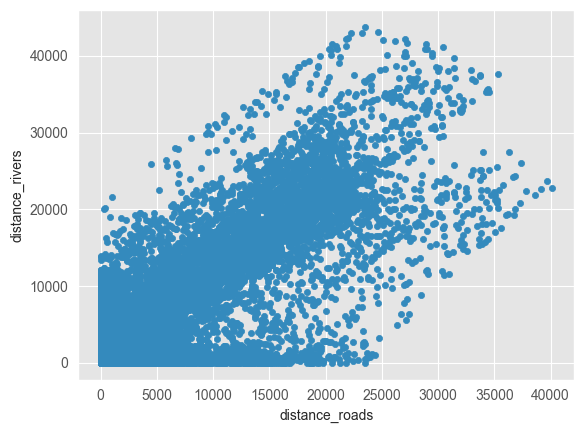

In [168]:
top2corr = df[["distance_roads", "distance_rivers"]] #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="distance_roads", y="distance_rivers") #hago el scatterplot con el comando .plot.scatter

<Axes: xlabel='water', ylabel='forest'>

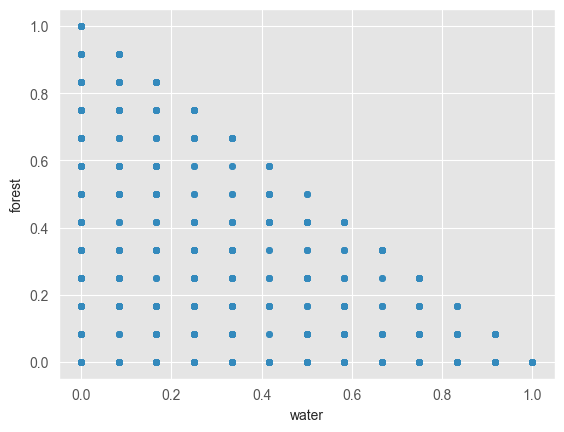

In [169]:
top2corr = df[["water", "forest"]]  #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="water", y="forest")  #hago el scatterplot con el comando .plot.scatter


<Axes: xlabel='distance_rivers', ylabel='water'>

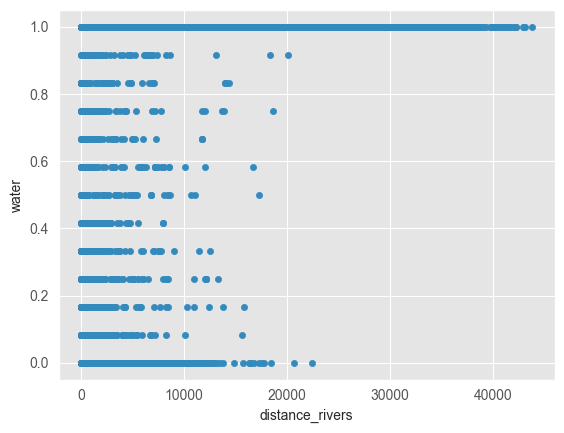

In [170]:
top2corr = df[["distance_rivers", "water"]]
top2corr.plot.scatter(x="distance_rivers", y="water")

In [316]:
pd.get_dummies(df.vegetation_class)

,cropland,forest,herbaceous_vegetation,shrubland,urban,water,wetland
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
22030,0,0,0,0,0,1,0
22031,0,1,0,0,0,0,0
22032,0,1,0,0,0,0,0
22033,0,0,0,0,0,1,0


In [171]:
dummy=pd.get_dummies(df.vegetation_class)
dummy.rename(columns={'cropland': 'cropland_dummy', 'forest': 'forest_dummy', 'herbaceous_vegetation': 'herbaceous_vegetation_dummy', 'shrubland': 'shrubland_dummy', 'urban': 'urban_dummy', 'water': 'water_dummy',
                      'wetland': 'wetland_dummy'}, inplace=True)
#dummy.head()
df1=df.join(dummy)
df1.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,forest,vegetation_class,ignition,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,1.000000,forest,1,0,1,0,0,0,0,0
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,0.833333,forest,1,0,1,0,0,0,0,0
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,1.000000,forest,1,0,1,0,0,0,0,0
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,0.000000,wetland,1,0,0,0,0,0,0,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,0.916667,forest,1,0,1,0,0,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


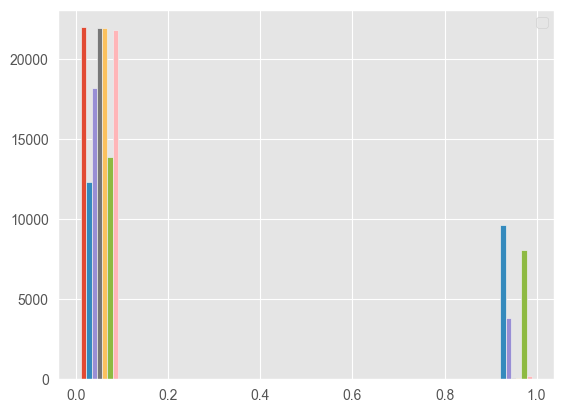

In [172]:
plt.legend()
plt.style.use('ggplot')
plt.hist(dummy)
plt.legend()

In [173]:
df1 = df1.drop('vegetation_class', 1)
df1=df1.sample(frac=1) # I sample the data since ignition points are not randomly divided

C:\Users\David\AppData\Local\Temp\ipykernel_12312\3947938703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('vegetation_class', 1)


In [327]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import time

In [175]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df1)
new_scaled = pd.DataFrame(x_scaled)
new_scaled.columns = df1.columns
new_scaled

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,sum_prec,forest,ignition,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
0,0.378512,0.365823,0.455560,0.331371,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,1.842375e-07,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.088053,0.142857,0.037928,0.140575,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,1.842375e-07,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.030192,0.011419,0.000000,0.017758,0.0,0.000000,0.000000,1.0,0.500000,0.000000,...,1.842375e-07,0.50,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.114588,0.132805,0.043647,0.527862,0.0,0.000000,0.000000,1.0,0.000000,1.000000,...,1.440060e-02,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.063726,0.138100,0.111540,0.183114,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,1.842375e-07,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22025,0.101203,0.085646,0.006235,0.515374,0.0,0.000000,1.000000,1.0,0.000000,0.000000,...,3.962919e-02,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22026,0.018245,0.008075,0.000000,0.000000,0.0,0.083333,0.000000,1.0,0.166667,0.666667,...,4.344321e-04,0.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22027,0.168025,0.383020,0.355411,0.381238,0.0,0.000000,0.000000,1.0,0.000000,0.000000,...,1.842375e-07,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22028,0.249512,0.028549,0.006235,0.266372,0.0,0.000000,0.166667,1.0,0.833333,0.000000,...,2.043624e-03,1.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [176]:
X = new_scaled.loc[:, new_scaled.columns != 'ignition']
y = new_scaled.loc[:, new_scaled.columns == 'ignition']

In [206]:
os = SMOTE(random_state=0)
X_arr = np.array(X)
y_arr = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=0)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)
#X_train.columns = X.columns
#X_test.columns=X.columns
#y_train.columns=y.columns
#y_test.columns=y.columns
#X_train

In [215]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [216]:
os_data_X.columns=X.columns
os_data_y.columns=y.columns

In [219]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['ignition']==0]))
print("Number of subscription",len(os_data_y[os_data_y['ignition']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['ignition']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['ignition']==1])/len(os_data_X))

length of oversampled data is  26196
Number of no subscription in oversampled data 13098
Number of subscription 13098
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [277]:
data_final_vars=new_scaled.columns.values.tolist()
y=['ignition']
X=[i for i in data_final_vars if i not in y]
y

['ignition']

# Logistic Regression

In [278]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False  True  True  True  True  True False False  True  True False False
 False  True  True False  True  True  True False False False  True  True
  True  True False False False  True False  True False False False False
  True False  True False]
[ 4  1  1  1  1  1  8 17  1  1  5  6 14  1  1 19  1  1  1 12 15 11  1  1
  1  1 13 18 10  1  7  1  2 16 20 21  1  9  1  3]


In [279]:
rfe.support_.shape

(40,)

In [280]:
cols=[]
for i in range(0,rfe.support_.shape[0]):
    if rfe.support_[i]==True : cols.append(X[i])
cols

['distance_rivers',
 'distance_roads',
 'distance_powerlines',
 'cropland',
 'forest_deciduous_broad',
 'forest_unknown',
 'herbaceous_vegetation',
 'water',
 'wetland',
 'elevation',
 'pop_dens',
 'slope',
 'anom_avg_rel_hum',
 'anom_avg_soil',
 'anom_sum_prec',
 'max_temp',
 'avg_rel_hum',
 'sum_prec',
 'shrubland_dummy',
 'water_dummy']

In [281]:
X=os_data_X[cols]
y=os_data_y['ignition']

In [282]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.397729
         Iterations 9
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.426     
Dependent Variable:    ignition            AIC:                 20877.8405
Date:                  2023-03-06 12:19    BIC:                 21041.3077
No. Observations:      26196               Log-Likelihood:      -10419.   
Df Model:              19                  LL-Null:             -18158.   
Df Residuals:          26176               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        9.0000                                             
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
distance_rivers         -2.7

p-values are all under 0.05 except for one variable: 'anom_avg_soil', so we can remove it

In [302]:
cols.remove('anom_avg_soil')
len(cols)

19

In [303]:
X=os_data_X[cols]
y=os_data_y['ignition']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.397793
         Iterations 9
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.426     
Dependent Variable:    ignition            AIC:                 20879.1634
Date:                  2023-03-06 12:24    BIC:                 21034.4573
No. Observations:      26196               Log-Likelihood:      -10421.   
Df Model:              18                  LL-Null:             -18158.   
Df Residuals:          26177               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        9.0000                                             
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
distance_rivers         -2.8

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [305]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [314]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3081  843]
 [ 494 3441]]


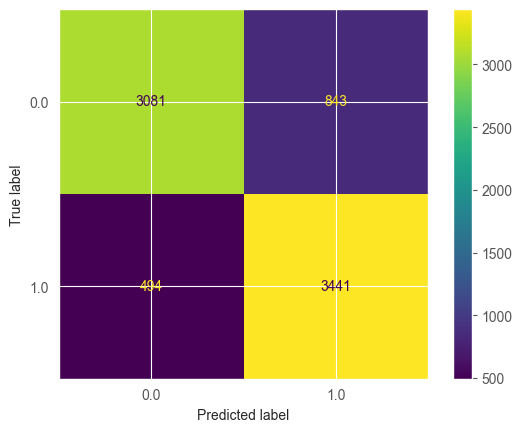

In [313]:
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=logreg.classes_)
  disp.plot()

In [315]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      3924
         1.0       0.80      0.87      0.84      3935

    accuracy                           0.83      7859
   macro avg       0.83      0.83      0.83      7859
weighted avg       0.83      0.83      0.83      7859



# Other Classification Methods

In [330]:
def classify(clf, X, y, alpha):
  #X = df[df.columns[+1:]]
  #y= df[df.columns[0]]
  target_names = ['No', 'Yes']
  start=time.time()
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=alpha,random_state=2)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  TimeL=time.time() - start
  print("Clasificacion:")
  print(clf)
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("%s seconds" % (time.time() - start))

  cm=confusion_matrix(y_test , y_pred, normalize="true")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  return

In [340]:
X_reset = os_data_X.loc[:, os_data_X.columns != 'ignition'] # I recover the original data, before features selection
y_reset = os_data_y.loc[:, os_data_y.columns == 'ignition'] #

C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Clasificacion:
KNeighborsClassifier()
              precision    recall  f1-score   support

          No       0.99      0.75      0.85      2620
         Yes       0.80      0.99      0.89      2620

    accuracy                           0.87      5240
   macro avg       0.90      0.87      0.87      5240
weighted avg       0.90      0.87      0.87      5240

3.2671849727630615 seconds


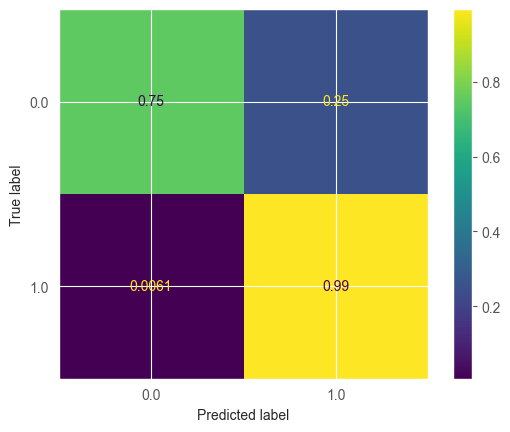

In [342]:
classify(KNeighborsClassifier(n_neighbors=5), X_reset, y_reset, 0.2)

C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Clasificacion:
KNeighborsClassifier()
              precision    recall  f1-score   support

          No       0.97      0.78      0.86      2620
         Yes       0.81      0.98      0.89      2620

    accuracy                           0.88      5240
   macro avg       0.89      0.88      0.88      5240
weighted avg       0.89      0.88      0.88      5240

4.294877290725708 seconds


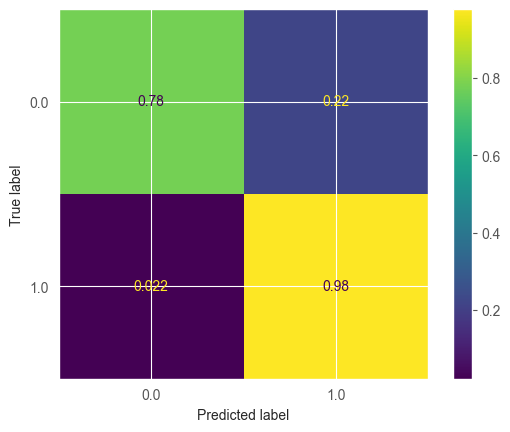

In [341]:
classify(KNeighborsClassifier(n_neighbors=5), X, y, 0.2)

Clasificacion:
DecisionTreeClassifier()
              precision    recall  f1-score   support

          No       0.89      0.87      0.88      2620
         Yes       0.87      0.89      0.88      2620

    accuracy                           0.88      5240
   macro avg       0.88      0.88      0.88      5240
weighted avg       0.88      0.88      0.88      5240

1.097381830215454 seconds


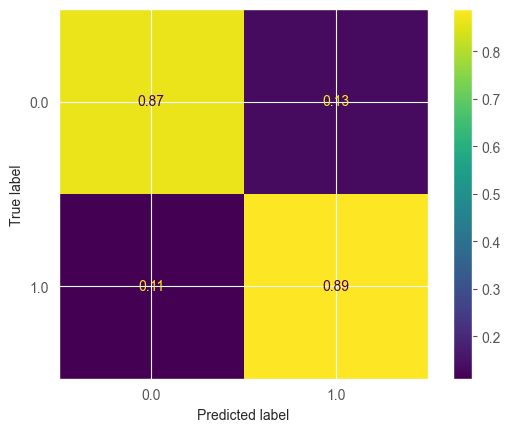

In [332]:
classify(DecisionTreeClassifier(), X, y, 0.2)

Clasificacion:
GaussianNB()
              precision    recall  f1-score   support

          No       0.85      0.68      0.76      2620
         Yes       0.74      0.88      0.80      2620

    accuracy                           0.78      5240
   macro avg       0.79      0.78      0.78      5240
weighted avg       0.79      0.78      0.78      5240

0.03124380111694336 seconds


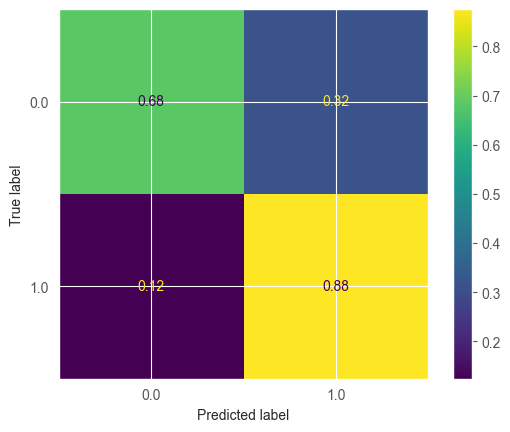

In [333]:
classify(GaussianNB(), X, y, 0.2)